### Dividir el dataset en conjunto de entrenamiento y de testing

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/advertising.csv')   

In [5]:
a = np.random.randn(len(data))

(array([ 3.,  1.,  5., 30., 37., 49., 45., 18.,  9.,  3.]),
 array([-3.32231635, -2.72644053, -2.13056472, -1.5346889 , -0.93881309,
        -0.34293727,  0.25293855,  0.84881436,  1.44469018,  2.04056599,
         2.63644181]),
 <BarContainer object of 10 artists>)

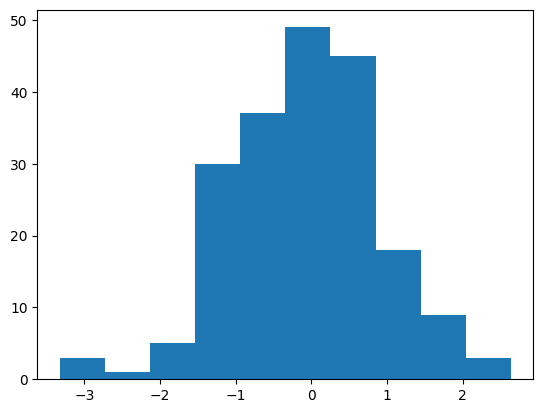

In [6]:
plt.hist(a)

In [7]:
check = a < 0.8
train = data[check]
test = data[~check]

In [9]:
len(train), len(test)

(167, 33)

In [10]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales~TV+Radio', data=train).fit()

In [11]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     750.8
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           2.81e-83
Time:                        03:29:54   Log-Likelihood:                -324.81
No. Observations:                 167   AIC:                             655.6
Df Residuals:                     164   BIC:                             665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9286      0.318      9.206      0.000       2.300       3.557
TV             0.0471      0.002     30.296      0.000       0.044       0.050
Radio          0.1831      0.009     20.496      0.000       0.165       0.201
==============================================================================
Omnibus:                       55.733   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.320
Skew:                          -1.417   Prob(JB):                     5.58e-31
Kurtosis:                       6.463   Cond. No.                         409.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales = 2.9286 + 0.0471*TV + 0.1831*Radio

### Validacion del modelo con el conjunto de testing

In [13]:
sales_pred = lm.predict(test)

In [14]:
sales_pred 

3      17.625729
6      11.642630
20     18.285742
25     15.949855
26     15.023326
31     11.431478
40     16.548151
41     17.379929
42     21.827019
50     12.905138
54     20.573323
60      5.814228
64     16.939741
66      8.916684
68     19.143856
69     21.176908
73     10.066006
78      8.658123
99     16.931386
108     3.618745
114    15.181075
116    12.102318
120    14.490185
122    13.916568
138     9.696289
148    12.097731
150    18.692511
154    15.636165
167    13.619326
169    18.257750
174    14.024340
190    12.314863
199    15.433341
dtype: float64

In [19]:
SSD = sum((test['Sales'] - sales_pred)**2) #Suma de los cuadrados de la diferencia
SSD

83.83492762850308

In [18]:
RSE = np.sqrt(SSD/(len(test) - 3)) #Error estandar residual
RSE

np.float64(1.6716750843440746)

In [ ]:
sales_mean = np.mean(test['Sales'])
error = RSE/sales_mean 
error

np.float64(0.12050082521484157)